# Project Final Report 

### DSCI-007 Group 20 Project

In [100]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.rows = 6)

In [106]:
players_data <-read_csv("https://raw.githubusercontent.com/amberer60s/DSCI-100---Group-Project/refs/heads/main/players%20(1).csv")
print(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 196 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Veteran    FALSE     b674dd7ee0d24096d1c0196…          0   Blake Male      17
 4 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 5 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 6 Amateur    TRUE      f58aad5996a435f16b0284a…          0   Adri… Female    17
 7 Regular    TRUE      8e594b8953193b26f498db9…          0   Luna  Female    19
 8 Amateur    FALSE     1d2371d8a35c8831034b25b…          0   Emer… Male      21
 9 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      17
10 Veteran    TRUE      bbe2d83de678f519c4b3daa…          0   Nyla  Female    22
# ℹ 186 

## Introduction ##

In the world of gaming, game developers and companies want to keep players engaged and attract new ones. One way to do this is by figuring out which players are most likely to play a lot, as this gives them a better idea of where to focus their marketing and recruitment efforts. The more time a player spends, the better the developers can understand how to improve the game and 

A big question for game developers is whether certain types of players are more likely to play for longer periods. 

For our project, we tried to answer the question : 

**"Can a player’s experience and age predict how much time they will spend playing the game?"**

Our aim is to see if there is a relationship between how old a player is / the experience a player has to how much they play. This could help game developers understand which age groups and experience categories are more likely to be active players.

#### **players.csv**
This dataset contains 196 player records with various variables describing their characteristics and behavior.

| Column Name   | Data Type | Description |
|--------------|----------|-------------|
| `experience` | character (chr) | Player's experience level (`Pro`, `Veteran`, `Regular`, and `Amateur`). |
| `subscribe`  | logical (lgl) | Indicates whether the player is a subscriber to the server (`True` or `False`). |
| `hashedEmail` | character (chr) | Hashed representation of the player's email. |
| `played_hours` | dbl | Total hours the player has played. |
| `name` | character (chr) | Player's name. |
| `gender` | character (chr) | Player's gender (e.g., Male, Female, Non-binary, etc.). |
| `Age` | double (dbl) | Player’s age (years). |

For our exploration in this project, we will focus mainly on the columns **experience**, **Age**, and **played_hours**. Based on this, we can draw the conclusions, 
- **Response Variable** : What we want to predict. In this case, the response variable is **played_hours**, which represennts the total time a players spends playing the game.
- **Exploratory Variable** : What we use to predict the response variable. For our project, the explanatory variables are **experience** and **Age**, as we are looking to see if a player's age can help predict how manny hours they will play. 

## Explortary and Visualization

Using summary function and is.na argument, we can check if there's any NA value in our dataset could interfere our calculations.

In [107]:
summary_players <- players_data |>
                    summarize(across(everything(), ~sum(is.na(.))))
summary_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


In the next step, we use functions like nrow and group_by to the dataset to find the number and percentage distribution of each experience level.Then summarize and across function can help us to summarize statistics in every column.

In [133]:
num_obs <- nrow(players_data)
players_data |>
  group_by(experience) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

#reports the number of observations in each variable
num_observations <- players_data |>
  summarise(across(everything(), ~sum(!is.na(.))))
num_observations

#reports the mean values for all numberic columns
numeric_cols <- players_data |> select(where(is.numeric))
means <- numeric_cols |> summarize(across(everything(), ~mean(., na.rm = TRUE)))
means

experience,count,percentage
<chr>,<int>,<dbl>
Amateur,63,32.142857
Beginner,35,17.857143
Pro,14,7.142857
Regular,36,18.367347
Veteran,48,24.489796


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
196,196,196,196,196,196,194


played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


Here since we're using experience as one predictor, we want to scale the experience level from 0 to 5, corresponding with "Beiginner","Regular","Amateur","Pro", and "Veteran". Therefore, we can apply recode function to make the experience from chr to dbl. In addition, using drop_na can help us to eliminate potential NA value that we don't want.

In [109]:
players_d <- players_data|>
            mutate(experience_numeric = recode(experience,
                                      "Beginner" = 1,
                                      "Regular" = 2,
                                      "Amateur" = 3,
                                      "Pro" = 4,
                                      "Veteran" = 5))|>
            drop_na()


Here we can use select function to select only columns we will use in the following steps, making our data frame clearer.

In [110]:
players_data <- players_d |>
                select(experience_numeric, Age, played_hours)

players_data |>
head(6)

experience_numeric,Age,played_hours
<dbl>,<dbl>,<dbl>
4,9,30.3
5,17,3.8
5,17,0.0
3,21,0.7
2,21,0.1
3,17,0.0


For visulization, 

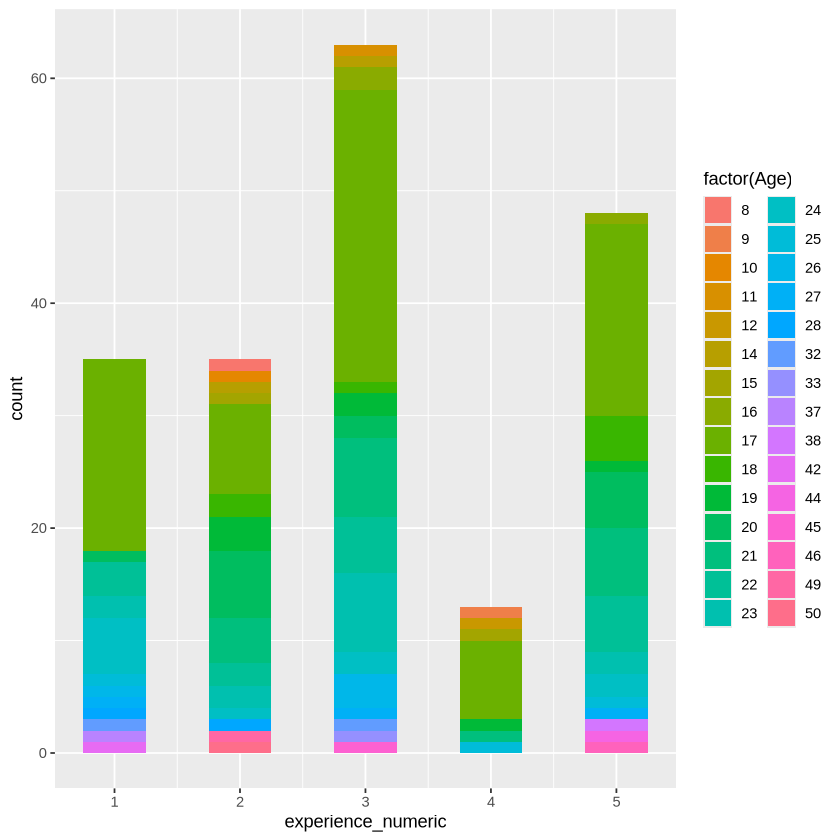

In [111]:
players_graph <- players_data |>
    ggplot(aes(x=experience_numeric,fill = factor(Age))) +
    geom_histogram(binwidth=0.5) 


players_graph

figure number: 1

Since the level3 experience has the most data, it's the highest bar. From all the 5 levels, age between 17 to 20 occupies the most of the bars, which means these are the players that contribute most to the played hours and they are scattered in all experience level. The second most section is around 20 to 25, then the least are people from 33 to 50, which mostly in level1 and level5. In addition, players under 10 also contribute a small section, mostly in level 2,4 and 3.

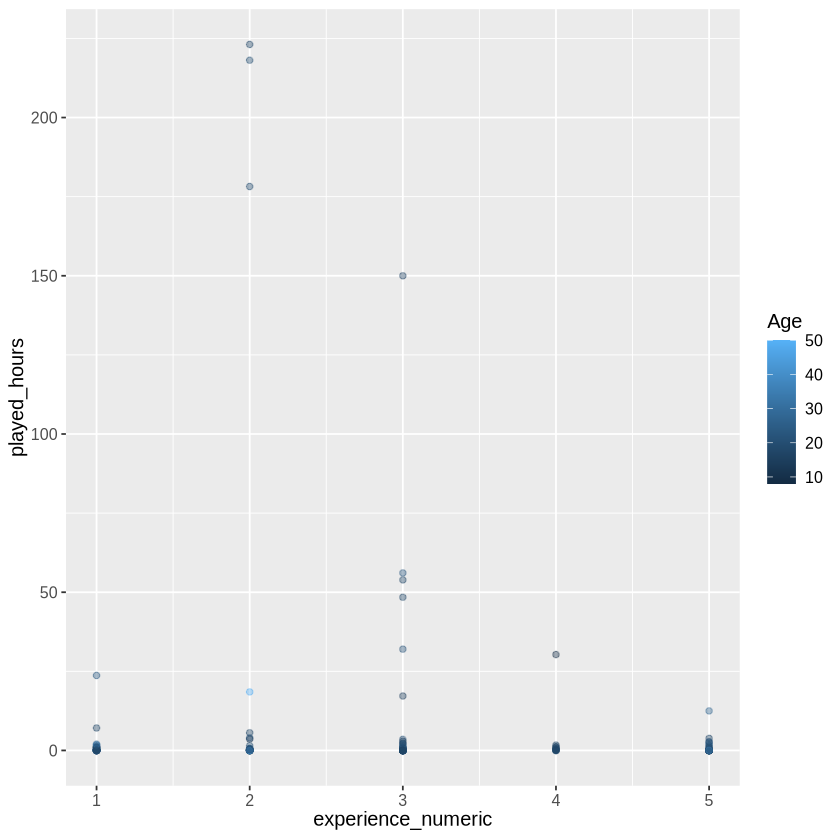

In [112]:
players_graph <- players_data |>
    ggplot(aes(x=experience_numeric,y=played_hours,color=Age)) +
    geom_point(alpha=0.4)+
    theme(text = element_text(size = 12))


players_graph

figure number: 2

From the point graph, we can see that most of the points clustered under 50 play hours. There are also some outliers around 200 hours and above. What's more, there's a big gap around 50 and 150, which kinda tells us people are like either go extremely high or the normal play hours, instead of clustering around middle.

For our knn-regression model:

In [113]:
#set seed
set.seed(123)

#split data into training and testing sets
players_split <- initial_split(players_data, prop=0.75, strat=played_hours) 
players_training <-training(players_split)
players_testing <-testing(players_split)

In [114]:
#make recipe
players_recipe <-recipe(played_hours ~ experience_numeric + Age, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

In [115]:
#make model
players_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

In [116]:
#make k column
gridvals <- tibble(neighbors = seq(1, 109))

#split training data into 5 fold for cross validation
players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

In [117]:
#calculate lowest root means squared error
players_multi <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  tune_grid(players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse") |>
  filter(mean == min(mean))

players_k <- players_multi |>
              pull(neighbors)
players_multi

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
109,rmse,standard,20.90873,5,8.213125,Preprocessor1_Model109


In [118]:
#fit created tuned model
players_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = players_k) |>
  set_engine("kknn") |>
  set_mode("regression")

In [119]:
#fit tuned model to training data
knn_players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_training)

In [120]:
#test accuracy of model on testing data
knn_players_preds <- knn_players_fit |>
  predict(players_testing) |>
  bind_cols(players_testing)

#calculate prediction accuracy of model for played hours
players_metrics <- metrics(knn_players_preds, truth = played_hours, estimate = .pred) |>
                     filter(.metric == 'rmse')

players_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,32.81132


In [ ]:
Relative_Error <-R / mean(observed_values) × 100%

**Summary of Main Findings:**
1. There is no direct trend relating players' experiences/age to the number of hours played
- shown in the graphs, played hours are very high for amateur players, but drop significantly for pro players, then rise back in veteran players
- diverse split in age, emphasizing ages 17-23 from the bar graph, though, across the scatter plot, age ~50 shows higher played hours (up to 225 hours).

2. KNN Regression is unreasonable
- RMSE is very high (32.81), as the mean of played hours is only 5.85

3. Some predictions were off
- few players have unusually high or low played hours that the KNN model could not predict well


**Expected or not?**

Considering this is a small data set, the amount of data points to analyze is minimal, therefore, it is expected that a direct/clear trend will not be shown between the exploratory and responsive variables.

**Impacts**

This model could help game developers or marketers identify how long a player might engage with the game based on their experience and age, designing features or content that cater to these observations.
Useful for:
- Personalized content (e.g., tutorials for beginners, challenges for pros/veterans)
- User retention strategies
- Paid content/subscriptions 

**Limitations**

Predictive models based only on experience and age miss out on other behavioural insights such as:
- Session frequency
- Game genre preferences
- Social/competitive play behavior

**Future Questions**

1. How can we identify a player's motivation (achievement, social interaction) based on their experience and age, and how does this impact playtime?
2. Does the amount of time spent playing increase a player’s experience level, creating a cycle that makes them more likely to play longer?
3. How will player experience and age correlation with played hours impact their response to game updates or new content?

